In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import os
from prophet import Prophet
import pandas as pd
from prophet.plot import add_changepoints_to_plot

In [2]:
df = pd.read_csv("Combined_Moo.csv").iloc[:,:2]
real = pd.read_csv("12.csv").iloc[:7,:2]

In [3]:
df['ds'] = pd.to_datetime(df['ds'], errors = 'coerce')
real['ds'] = pd.to_datetime(real['ds'], errors = 'coerce')

In [4]:
df['y'] = df['y'].str.replace(',', '').astype('int64')
real['y'] = real['y'].str.replace(',', '').astype('int64')

In [5]:
df.loc[df['y'] == 0, 'y'] = df['y'].mean()
df['y'] = df['y'].round(0)
real.loc[real['y'] == 0, 'y'] = real['y'].mean()
real['y'] = real['y'].round(0)

In [25]:
model = Prophet()
model.fit(df)

22:47:05 - cmdstanpy - INFO - Chain [1] start processing
22:47:05 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = model.make_future_dataframe(periods=8)
forecast = model.predict(future)

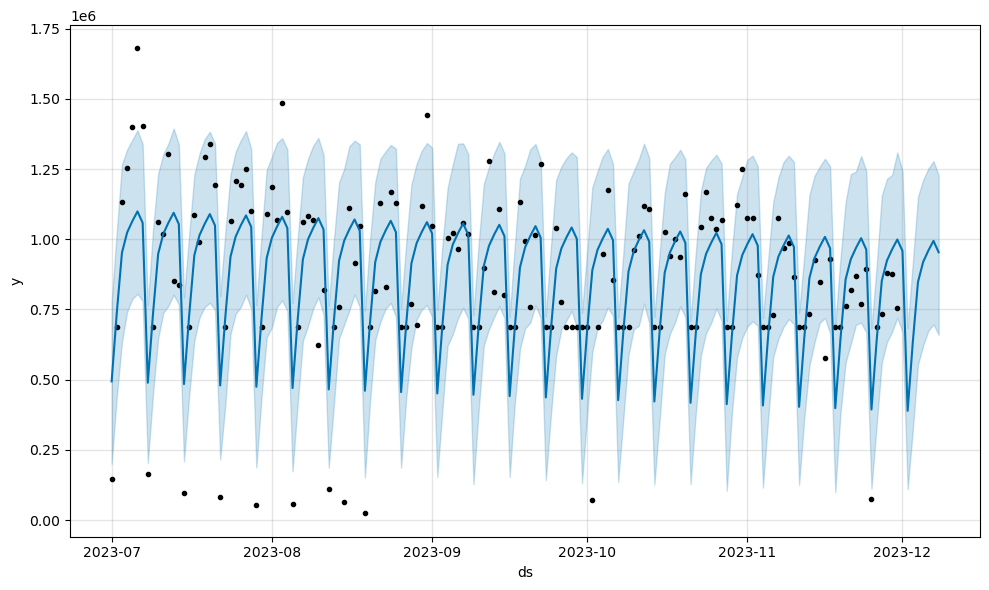

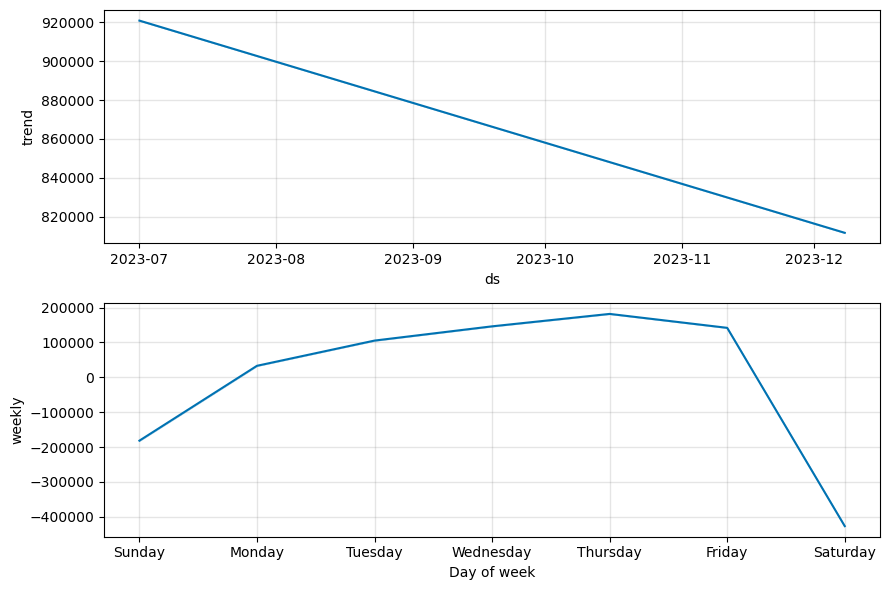

In [27]:
fig = model.plot(forecast)
fig1 = model.plot_components(forecast)

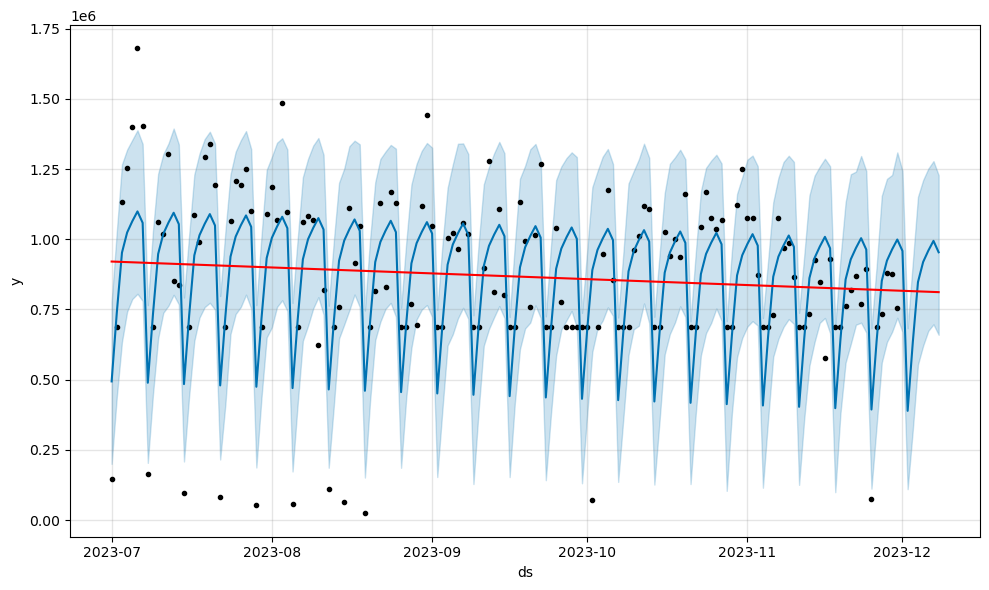

In [28]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

22:47:21 - cmdstanpy - INFO - Chain [1] start processing
22:47:21 - cmdstanpy - INFO - Chain [1] done processing


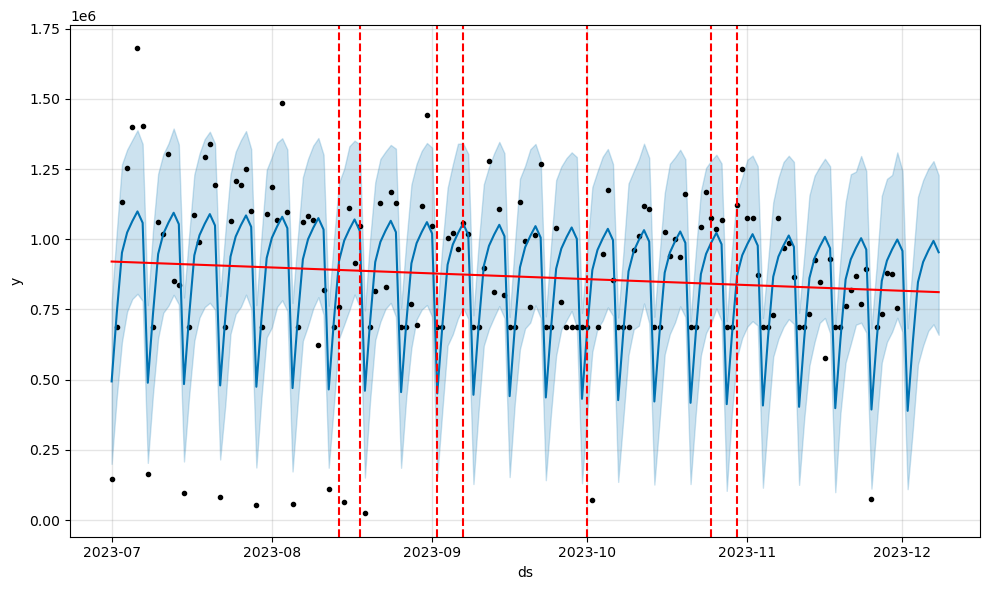

In [29]:
model1 = Prophet(changepoint_prior_scale=1) # 값 증가에 따라 trend 변화점 민감하게 반응[default = 0.05]
# model = Prophet(changepoints = ) # 트렌드가 바뀌는 지점(특정 지정날) 직접 추가
# model = Prophet(n_changepoints=) # changepoint 수 지정
# model = Prophet(changepoint_range=0.8) # 기본적으로 데이터 중 80% 범위 내 changepoint 설정

model1.fit(df)

fig = model1.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model1, forecast)

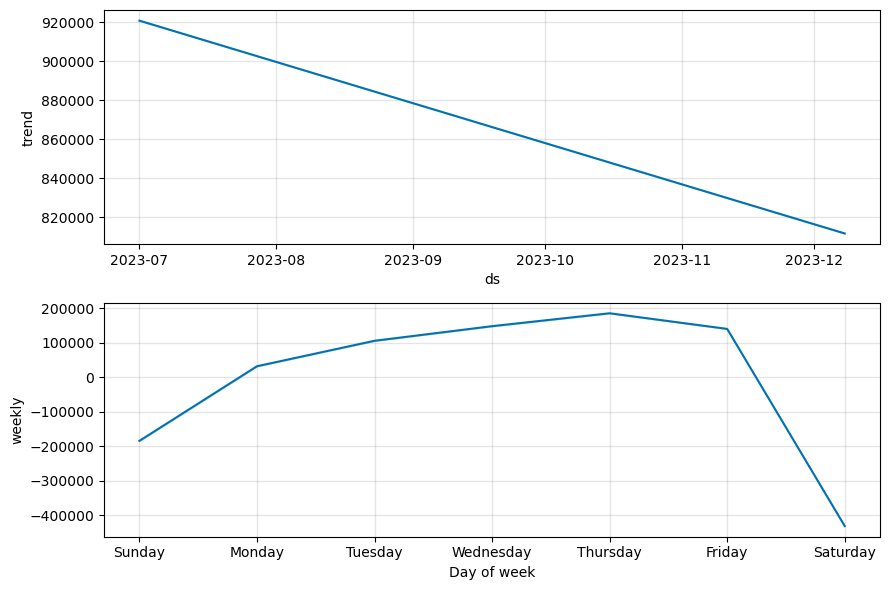

In [30]:
fig2 = model1.plot_components(forecast)

22:49:34 - cmdstanpy - INFO - Chain [1] start processing
22:49:34 - cmdstanpy - INFO - Chain [1] done processing


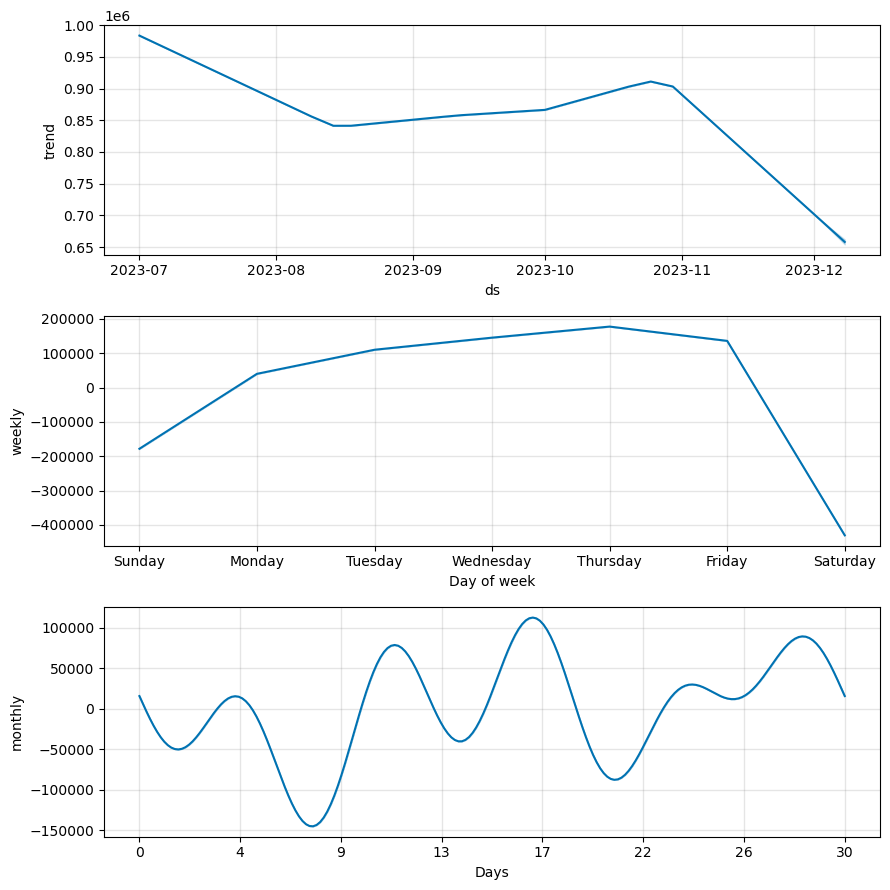

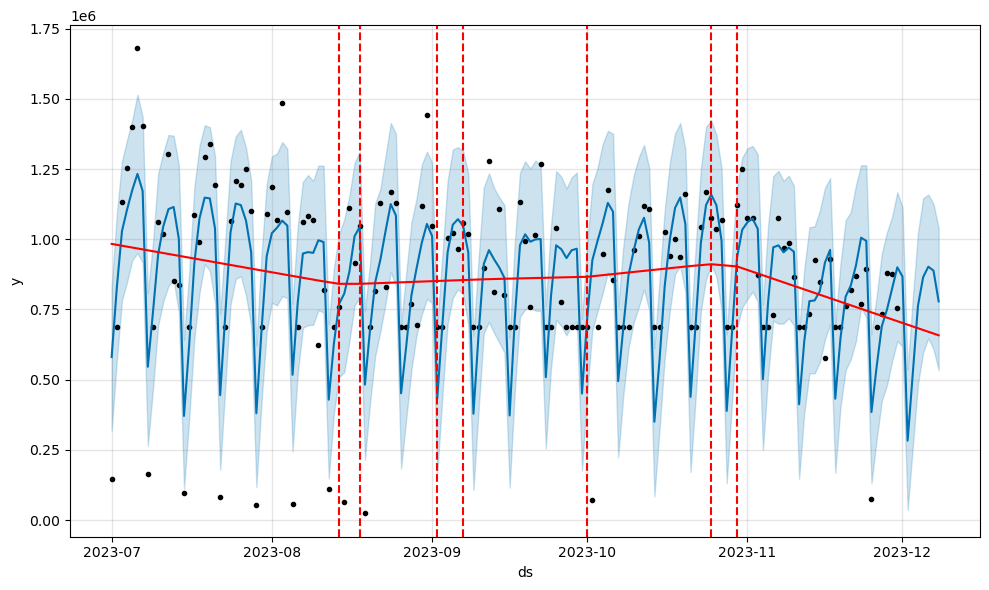

In [81]:
mode2 = Prophet(
    changepoint_prior_scale=0.5,
    #weekly_seasonality=10,
    daily_seasonality=False,
    #seasonality_mode='multiplicative'
)

mode2.add_seasonality(name = 'monthly', period = 30.5, fourier_order=5)

mode2.fit(df)
forecast = mode2.predict(future)
fig = mode2.plot_components(forecast)
fig = mode2.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model1, forecast)

In [82]:
f_date = forecast['ds'].iloc[-8:] #날짜
f_min = forecast['yhat_lower'].iloc[-8:] #최솟값
f_max = forecast['yhat_upper'].iloc[-8:] #최댓값
f_mean = forecast['yhat'].iloc[-8:] #평균값

In [83]:
f_mean = f_mean.reset_index(drop = True)

In [84]:
Date = real['ds'].reset_index(drop = True)
Date = Date.iloc[:8]

In [85]:
real = real.iloc[:8]
real

ds         y
0 2023-12-01  946820.0
1 2023-12-02   62800.0
2 2023-12-03  603205.0
3 2023-12-04  668600.0
4 2023-12-05  837710.0
5 2023-12-06  719660.0
6 2023-12-07  986848.0

In [86]:
Actual_Sales = real['y'].reset_index(drop = True)

In [87]:
Expected_sales = f_mean.round(0)

In [88]:
Error_Rate = ((Actual_Sales - f_mean.round(0))/f_mean.round(0)).mul(100).abs().round(0)

In [89]:
verification = pd.DataFrame({'Date' : Date,'Actual_Sales' : Actual_Sales, 
                            'Expected_Sales' : Expected_sales, 'Error_Rate' : Error_Rate.astype('str') + '%'})

In [90]:
verification

Date  Actual_Sales  Expected_Sales Error_Rate
0 2023-12-01      946820.0        867475.0       9.0%
1 2023-12-02       62800.0        282778.0      78.0%
2 2023-12-03      603205.0        524687.0      15.0%
3 2023-12-04      668600.0        763224.0      12.0%
4 2023-12-05      837710.0        865046.0       3.0%
5 2023-12-06      719660.0        902478.0      20.0%
6 2023-12-07      986848.0        888500.0      11.0%
7        NaT           NaN        778843.0       nan%

In [91]:
Error_Rate_Mean = round(Error_Rate.mean())
Error_Rate_Mean

21

In [44]:
mse = round(((f_mean - Actual_Sales) ** 2).mean())
mae = round(np.abs(f_mean - Actual_Sales).mean())
rmse = round(np.sqrt(mse))
print(mse,mae,rmse)

16139828809 111336 127043
